# Baseline models for time series: establishing a benchmark

## Table of Contents
* [1. Baseline models](#chapter1)
    * [1.1 The importance of baseline models](#section_1_1)
    * [1.2 Baseline models for time series](#section_1_2)
        * [1.2.1 Naïve method](#section_1_2_1)
        * [1.2.1 Average method](#section_1_2_2)
        * [1.2.1 Drift method](#section_1_2_3)

In [1]:
# data handling
import pandas as pd
import numpy as np

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# time series handling
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# modeling
import pycaret


# visualization
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt

# Baseline models<a class="anchor" id="chapter1"></a>

## The importance of baseline models<a class="anchor" id="section_1_1"></a>

A **<span style="color:orange">baseline</span>** model is a model that generates trivial predictions, i.e. a very simple model whose predictions have very little predictive potential. 

There is no good model for all problems, but the choice of the optimal model will depend on the particular problem and its characteristics (complexity, objective, etc.). In order to be able to differentiate valid models from useless ones, a **<span style="color:green">benchmark</span>** to overcome must be established. This is done by defining a very simple model (baseline) whose predictions are intended to be improved by a more complex model; if this does not happen, the model can be discarded. The risk of increasing unnecessary model complexity is reduced by incorporating baseline models (<span style="color:green">**parsimonious**</span> models are always preferred). 

Recall that the predictive capability of a model is strongly determined by the quality of the data used: <span style="color:brown"> a model is only as good as the data it is provided with</span>. A baseline model can indicate whether the <span style="color:green">data is insufficient</span>. If a trained model cannot outperform the baseline model, it may indicate that the dataset lacks predictive power. In this case, it is better to check the quality of the data instead of continuing to train models. The baseline model can also provide insight by showing which <span style="color:green">features it considers most important</span>. This is helpful because the model's assessment of which features are important should be supported by domain knowledge of the subject. When a trained model ignores features that should be important, it can mean that the data does not properly capture the information those features represent.

## Baseline models for time series<a class="anchor" id="section_1_2"></a>

Different baseline models are now introduced and applied on the airline time series: 

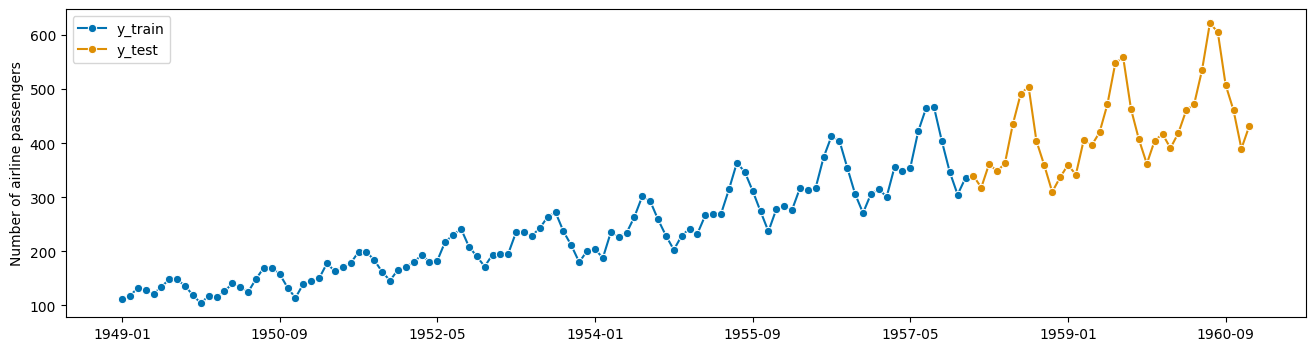

In [2]:
y = load_airline() # load example data
y_train, y_test = temporal_train_test_split(y, test_size=36) # train test split
fh = ForecastingHorizon(y_test.index, is_relative=False) # set the indexs to predict (from the test data)

plot_series(y_train, y_test, labels=["y_train", "y_test"]) # plot series
plt.show()

### Naïve method<a class="anchor" id="section_1_2_1"></a>
This method assumes that the predictions are equal to the last known value of the series. The assumption followed by this method is that its value tomorrow is equal to its value today. If changes in the series occur very slowly over time, this could be a good starting point. Mathematically it is expressed as follows:
$$
\hat{y}_{t+h|t}=y_t,
$$
where $\hat{y}_{t+h|t}$ the forecast at the time horizon $h$ knowing all information up to time $t$. 

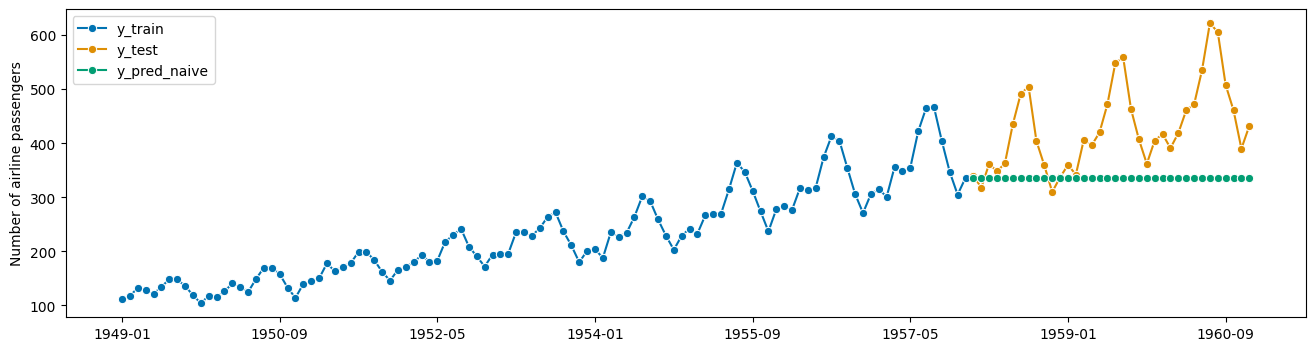

In [3]:
naive_method = NaiveForecaster(strategy="last") # naive forecaster (without seasonality)
naive_method.fit(y_train) # fit the naive forecaster 
y_pred_naive = naive_method.predict(fh) # predict for the desired timestamps fh

plot_series(y_train, y_test, y_pred_naive, labels=["y_train", "y_test", "y_pred_naive"]) # plot results
plt.show()

A seasonal component can be added to the above if its period $sp$ is known:

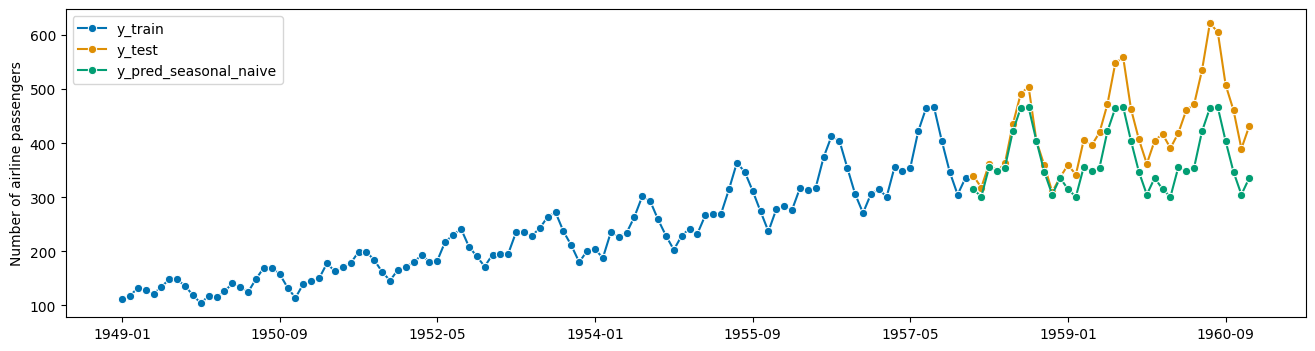

In [4]:
naive_seasonal_method = NaiveForecaster(strategy="last", sp=12) # naive forecaster (with seasonality)
naive_seasonal_method.fit(y_train) # fit the naive forecaster 
y_pred_seasonal_naive = naive_seasonal_method.predict(fh) # predict for the desired timestamps fh

plot_series(y_train, y_test, y_pred_seasonal_naive, labels=["y_train", "y_test", "y_pred_seasonal_naive"]) # plot results
plt.show()

### Average method<a class="anchor" id="section_1_2_2"></a>

Uses the average (mean) value of all historical data as the forecast. For data with little variance or whose value is close to the mean, this is quite useful. Mathematically:
$$
\hat{y}_{t+h|t} = \bar{y} = \frac{1}{n}\sum_{i=1}^{n}{y_t}
$$



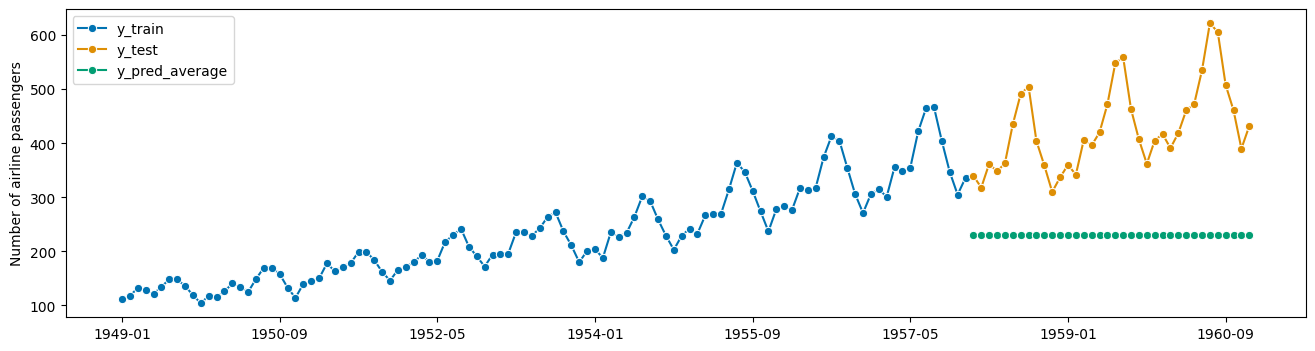

In [5]:
average_method = NaiveForecaster(strategy="mean") # average forecaster
average_method.fit(y_train) # fit the average forecaster 
y_pred_average = average_method.predict(fh) # predict for the desired timestamps fh

plot_series(y_train, y_test, y_pred_average, labels=["y_train", "y_test", "y_pred_average"]) # plot results
plt.show()

The above method can be modified to take as a prediction the average of a fixed number of previous values. In this way, more recent observations are taken into account.

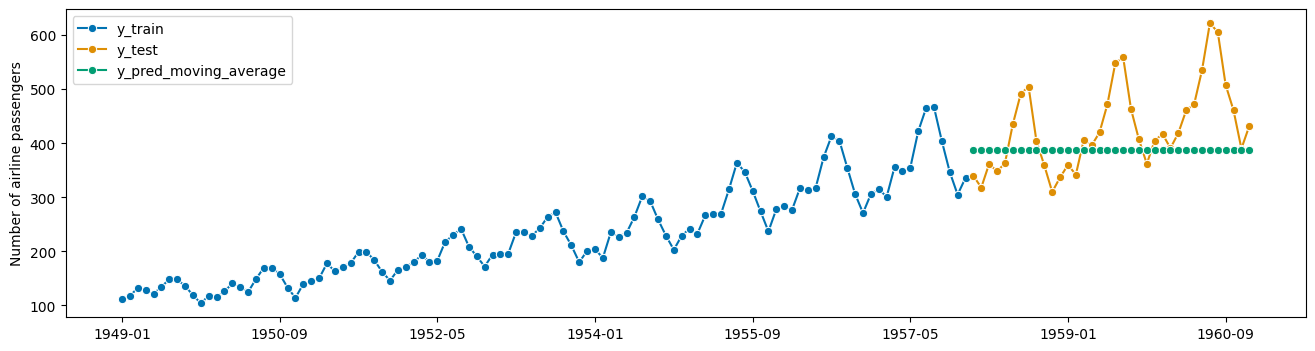

In [6]:
moving_average_method = NaiveForecaster(strategy="mean", window_length=6) # moving average forecaster using 6 past observations
moving_average_method.fit(y_train) # fit the moving average forecaster 
y_pred_moving_average = moving_average_method.predict(fh) # predict for the desired timestamps fh

plot_series(y_train, y_test, y_pred_moving_average, labels=["y_train", "y_test", "y_pred_moving_average"]) # plot results
plt.show()

### Drift method<a class="anchor" id="section_1_2_3"></a>

Drift can be defined as the amount of variation present in the data. This method calculates the average change in the historical data and extends the changes into the future, i.e. it fits a line between the first and last value of the data and extrapolates it into the future. This method works well on data that follows a general trend over time.Mathematically:
$$
\hat{y}_{t+h|t} = y_t + h \frac{y_t-y_0}{t-t_0}
$$

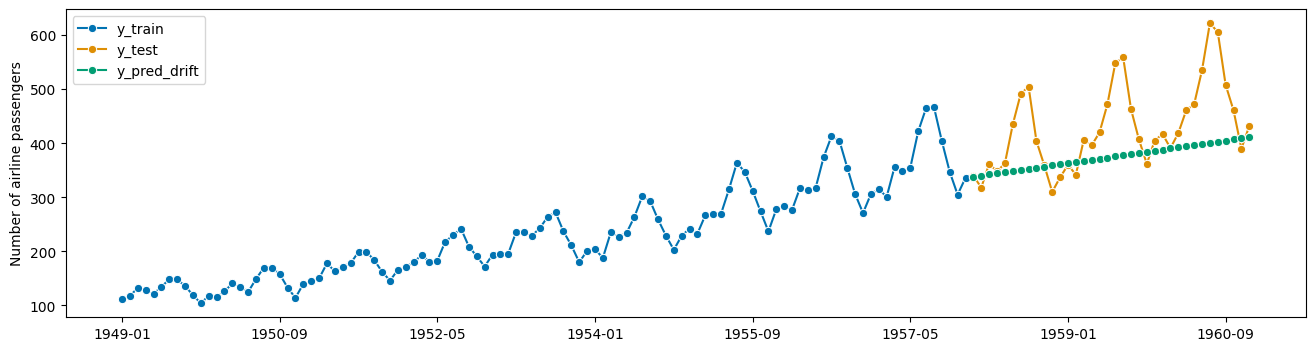

In [7]:
drift_method = NaiveForecaster(strategy="drift") # drift forecaster
drift_method.fit(y_train) # fit the drift forecaster 
y_pred_drift = drift_method.predict(fh) # predict for the desired timestamps fh

plot_series(y_train, y_test, y_pred_drift, labels=["y_train", "y_test", "y_pred_drift"]) # plot results
plt.show()

# Requirements

The modules loaded in the current session, Python, the OS and CPU are listed below for reproducibility. 

In [10]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.3.4
numpy               1.21.6
pandas              1.4.4
pycaret             3.0.0.rc4
session_info        1.0.0
sktime              0.13.4
-----
IPython             8.5.0
jupyter_client      7.3.5
jupyter_core        4.11.1
notebook            6.4.12
-----
Python 3.8.8 (default, Apr 13 2021, 19:58:26) [GCC 7.3.0]
Linux-5.15.0-46-generic-x86_64-with-glibc2.10
-----
Session information updated at 2022-10-01 17:33
